In [ ]:
# Decision Tree Classifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "/Play_Football_100_Entries.csv"  # Replace with the correct file path
football = pd.read_csv(file_path)

In [4]:
football

,Outlook,Temperature,Humidity,Wind,Play Football
0,Overcast,Cool,High,Strong,Yes
1,Overcast,Mild,Normal,Weak,Yes
2,Sunny,Mild,High,Weak,Yes
3,Overcast,Hot,High,Strong,Yes
4,Rain,Hot,Normal,Weak,Yes
...,...,...,...,...,...
95,Sunny,Cool,Normal,Weak,Yes
96,Sunny,Mild,Normal,Weak,Yes
97,Sunny,Mild,High,Strong,Yes
98,Sunny,Mild,Normal,Strong,No


In [5]:

# Convert categorical data into numerical data using one-hot encoding

TrainD = pd.get_dummies(football [["Outlook", "Temperature", "Humidity", "Wind"]])

# Convert target to binary (Yes=1, No=0)
TrainL = football ["Play Football"].apply(lambda x: 1 if x == "Yes" else 0)

In [6]:
TrainD.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,True,False,False,True,False,False,True,False,True,False
1,True,False,False,False,False,True,False,True,False,True
2,False,False,True,False,False,True,True,False,False,True
3,True,False,False,False,True,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True


In [9]:
TrainD.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,True,False,False,True,False,False,True,False,True,False
1,True,False,False,False,False,True,False,True,False,True
2,False,False,True,False,False,True,True,False,False,True
3,True,False,False,False,True,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True


In [8]:
TrainL.head()

,Play Football
0,1
1,1
2,1
3,1
4,1


In [10]:
TrainL.head()

,Play Football
0,1
1,1
2,1
3,1
4,1


In [11]:

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(TrainD, TrainL, test_size=0.2, random_state=0)

In [12]:
X_test.shape

(20, 10)

In [14]:
X_train.shape

(80, 10)

In [15]:
 X_test

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
26,False,False,True,False,False,True,True,False,True,False
86,True,False,False,False,True,False,True,False,True,False
2,False,False,True,False,False,True,True,False,False,True
55,True,False,False,False,True,False,False,True,True,False
75,False,True,False,True,False,False,True,False,False,True
93,False,False,True,False,True,False,True,False,False,True
16,False,False,True,False,False,True,True,False,False,True
73,False,False,True,False,True,False,True,False,False,True
54,True,False,False,True,False,False,False,True,True,False
95,False,False,True,True,False,False,False,True,False,True


In [16]:
# Decision Tree Classifier


print("Decision Tree Classifier Results:")

DTC_football = DecisionTreeClassifier(criterion="entropy", random_state=0)

Decision Tree Classifier Results:


In [17]:
#Fit the model

# model.fit(X_train, y_train)DT_Classifier_football

DTC_football.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# Prediction of Traine dclassifer

# model.predict(test sample)

y_pred_dt = DTC_football.predict(X_test)

In [19]:
y_test

,Play Football
26,1
86,0
2,1
55,0
75,0
93,0
16,0
73,1
54,0
95,1


In [20]:
y_pred_dt

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [21]:
# Evaluation Model


# Evaluate Decision Tree Classifier
# Comparision between true label and predicted label


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.20      0.29      0.24         7

    accuracy                           0.35        20
   macro avg       0.35      0.34      0.34        20
weighted avg       0.40      0.35      0.36        20



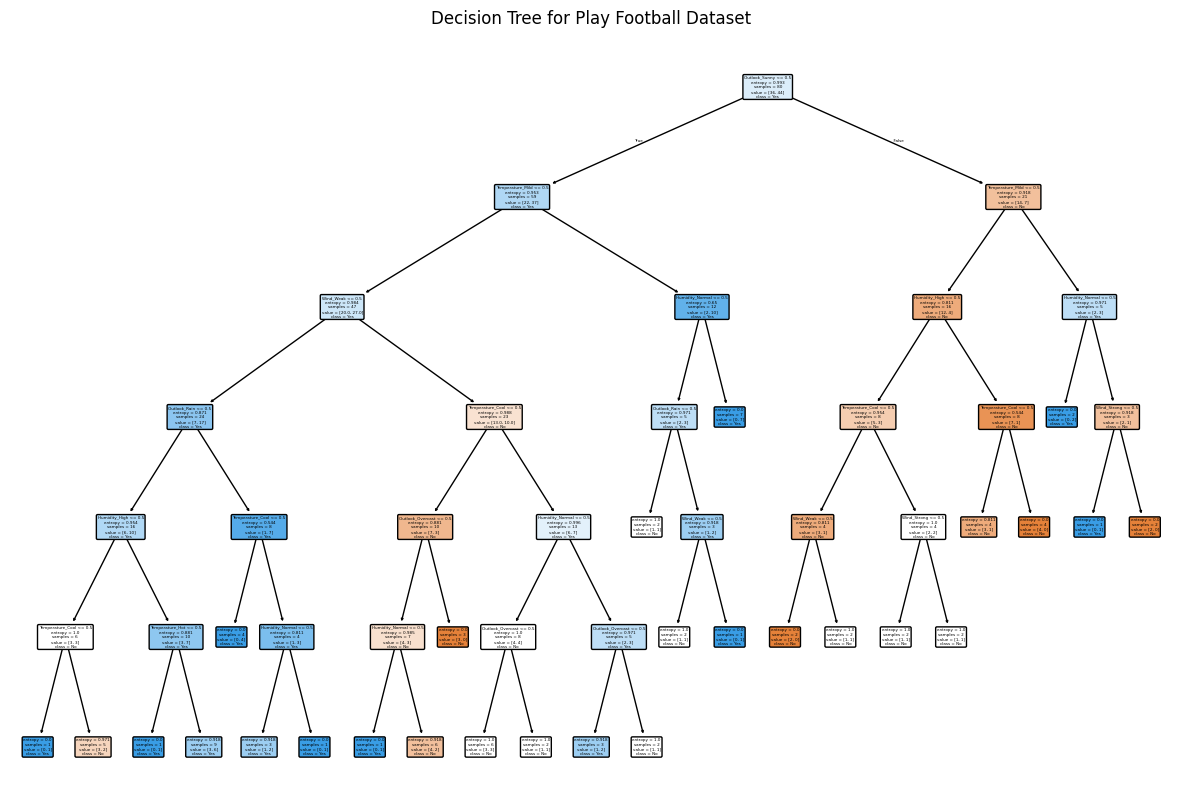

In [22]:

# Plot Decision Tree


plt.figure(figsize=(15, 10))
plot_tree(DTC_football, feature_names=TrainD.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree for Play Football Dataset")
plt.show()